In [1]:
#loading data into the data frame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#importing turbidity measurements 
turb = pd.read_excel('physiochemical data.xlsx', sheet_name='Master Physiochem', usecols=['Turbidity (NTU)'])
#checking that data was correctly imported
turb.head()

#importing total suspended solids measurements 
tss = pd.read_excel('physiochemical data.xlsx', sheet_name='TSS', usecols=['TSS (% w/v)'])




#importing wavelengths 
wavelengths = pd.read_excel('SAMPLE SET 1.xlsx', sheet_name='SAMPLE SET 1', nrows=1, header = None)
#column one does not have a value, dropping this column
wavelengths = wavelengths.drop(columns=wavelengths.columns[0])
#dropping the last two columns which are strings, not floats
wavelengths = wavelengths.drop(columns=wavelengths.columns[125:])
#extracting values so I can plot
wavelengths = wavelengths.iloc[0].values
#checking that data was correctly imported
#print(wavelengths)

#we could put a for loop here for all sets of samples
#importing absorbances and wavelengths of treated water (tw)
tw = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='SAMPLE SET 2', skiprows = range(1,109), header = None)
#dropping first column with sample names -might undo this later
tw = tw.drop(columns=tw.columns[0])
#dropping last two columns which are non numeric
tw = tw.drop(columns=tw.columns[125:])


#extracting individual samples
#A1 triplicate value average, averaging three rows element-wise
A1 = tw.iloc[[1, 3]].mean(axis=0)
B1 = tw.iloc[[4, 6]].mean(axis=0)
C1 = tw.iloc[[7, 9]].mean(axis=0)
D1 = tw.iloc[[10, 12]].mean(axis=0)
E1= tw.iloc[[13, 15]].mean(axis=0)
F1 = tw.iloc[[16, 18]].mean(axis=0)
G1 = tw.iloc[[19, 21]].mean(axis=0)
H1 = tw.iloc[[22, 24]].mean(axis=0)



In [2]:
#extracting blank readings (no contamination, clean water)
blank = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='BLANK', skiprows = 1, header = None)
#dropping first column with sample names -might undo this later
blank = blank.drop(columns=blank.columns[0])
#dropping last two columns which are non numeric
blank = blank.drop(columns=blank.columns[125:])


blnk1 = blank.iloc[0].values
blnk2 = blank.iloc[1].values
blnk3 = blank.iloc[2].values

In [3]:
#extracting blackwater readings (contaminated water without any treatment)
bw = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='BW SAMPLES', skiprows = 1, header = None)
#dropping first column with sample names -might undo this later
bw = bw.drop(columns=bw.columns[0])
#dropping last two columns which are non numeric
bw = bw.drop(columns=bw.columns[125:])


bw1 = bw.iloc[[1, 3]].mean(axis=0)
bw2 = bw.iloc[[4, 6]].mean(axis=0)
bw3 = bw.iloc[[7, 9]].mean(axis=0)
bw4 = bw.iloc[[10, 12]].mean(axis=0)
bw5 = bw.iloc[[13, 15]].mean(axis=0)
bw6 = bw.iloc[[16, 18]].mean(axis=0)
bw7 = bw.iloc[[19, 21]].mean(axis=0)
bw8 = bw.iloc[[22, 24]].mean(axis=0)

In [4]:
#visualizing a clean water sample, an untreated water sample, and a treated water sample
#Assume you have a DataFrame with multiple rows (e.g., 6 rows), and you want to average every pair (rows 0 & 1, 2 & 3, 4 & 5), then plot all three averages.
# Create a DataFrame for plotting
#for i in range(0, len(df), 2):
   # avg = df.iloc[[i, i+1]].mean(axis=0)
   # averages.append(avg)
   # labels.append(f'Sample {i//2 + 1}')

# Build long-form DataFrame for Seaborn
#plot_df = pd.DataFrame({
   # 'x': np.tile(x, len(averages)),
   ## 'sample': np.repeat(labels, len(x))
#})

# Plot
#sns.set(style="whitegrid")
#plt.figure(figsize=(14, 6))
#sns.lineplot(data=plot_df, x='x', y='average', hue='sample', marker='o')
#plt.title("Averaged Samples Across 125 Features")
#plt.xlabel("Feature Index")
#plt.ylabel("Average Value")
#plt.legend(title="Sample Group")
#plt.tight_layout()
#plt.show()



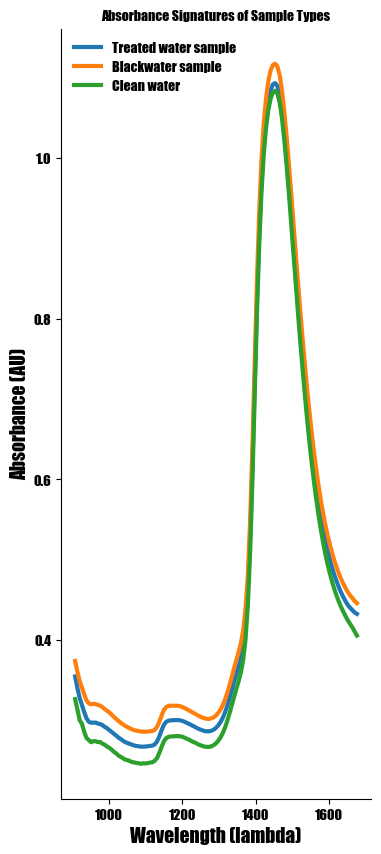

In [5]:
#From HW 2
# Set custom rcParams: compare this to the codes I gave you for the first ICA
plt.rcParams.update({                     # This is the big difference to the code before, here we customize the setting for all the following subplots
    # Figure
    'figure.figsize': (4, 10),
    'figure.dpi': 100,                    # dpi stand for dots per inch
    # Font
    'font.family': 'fantasy',
    'font.size': 12,
    # Axes
    'axes.titlesize': 10,                 # Setting for axis like title and label
    'axes.labelsize': 14,                   
    'axes.spines.top': False,             # Spines note boundaries of the data area and are disabled here
    'axes.spines.right': False,
    # Ticks
    'xtick.direction': 'out',             # ticks are pointing outwards now for x-axis
    'ytick.direction': 'out',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    # Legend
    'legend.fontsize': 10,
    'legend.frameon': False,
    # Lines
    'lines.linewidth': 3,
    'lines.markersize': 18,
    # Grid
    'grid.linewidth': 0.5,
    'grid.alpha': 0.8,
    # Color cycle
    'axes.prop_cycle': plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
                                            # Setting a cycle for colors to be used
})
fig1, ax1 = plt.subplots()
ax1.plot(wavelengths, A1, label='Treated water sample')                       
ax1.plot(wavelengths, bw1, label='Blackwater sample')
ax1.plot(wavelengths, blnk1, label='Clean water')
ax1.set_title('Absorbance Signatures of Sample Types')
ax1.set_xlabel('Wavelength (lambda)')
ax1.set_ylabel('Absorbance (AU)')
ax1.legend()


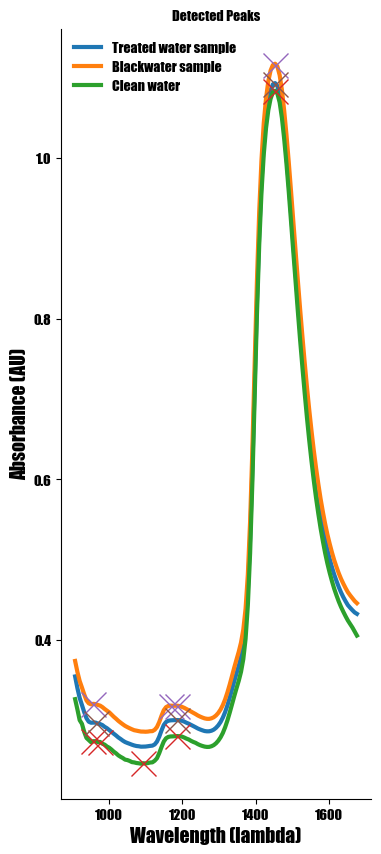

In [6]:
#finding peaks in the data -which may be used in the correlation matrix to try and correlate TSS, Turbidity
from scipy.signal import find_peaks
blnk1_peaks, _ = find_peaks(blnk1)
A1_peaks, _ = find_peaks(A1)
bw1_peaks, _ = find_peaks(bw1)

#plotting spectral signatures
plt.plot(wavelengths, A1, label='Treated water sample')                    
plt.plot(wavelengths, bw1, label='Blackwater sample')
plt.plot(wavelengths, blnk1, label='Clean water')

#marking peaks on signatures based on scipy find_peaks function
plt.plot(wavelengths[blnk1_peaks], blnk1[blnk1_peaks], "x")  
plt.plot(wavelengths[bw1_peaks], bw1[bw1_peaks], "x")
plt.plot(wavelengths[A1_peaks], A1[A1_peaks], "x") 
plt.title("Detected Peaks")
plt.xlabel('Wavelength (lambda)')
plt.ylabel('Absorbance (AU)')
plt.legend()



[np.int64(88), np.int64(45)]
[ 9 45 88]
[ 8 42 45 88]
[ 8 11 30 45 88]
[np.int64(45), np.int64(88)]


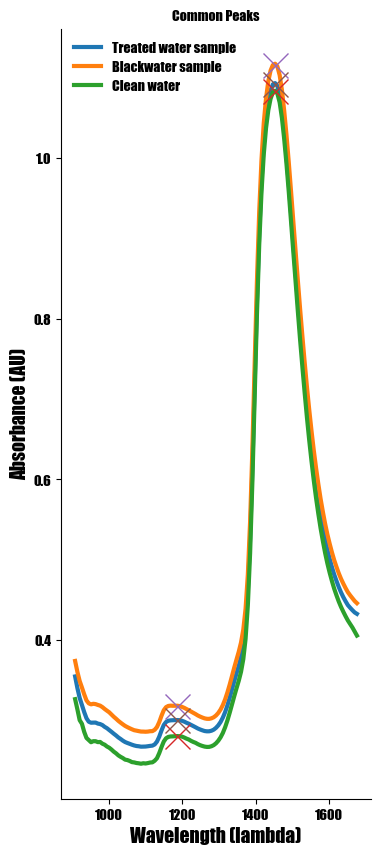

In [8]:
#finding common peak indices
com_peaks = list(set(A1_peaks) & set(bw1_peaks) & set(blnk1_peaks)) 
print(com_peaks)
print(A1_peaks)
print(bw1_peaks)
print(blnk1_peaks)
#finding common peak indices within a tolerance
longest = max([A1_peaks, bw1_peaks, blnk1_peaks], key=len)

tolerance = 2
com_peaks_tol = []

for i, val in enumerate(longest): #not working yet
    # Find nearby indices in A1
    a1_matches = [j for j, v in enumerate(A1_peaks) if v == val and abs(j - i) <= tolerance]
    bw1_matches = [j for j, v in enumerate(bw1_peaks) if v == val and abs(j - i) <= tolerance]
    blnk1_matches = [j for j, v in enumerate(blnk1_peaks) if v == val and abs(j - i) <= tolerance]

    if a1_matches and bw1_matches and blnk1_matches:
        com_peaks_tol.append(val)
print(com_peaks_tol)

#plotting spectral signatures
plt.plot(wavelengths, A1, label='Treated water sample')                    
plt.plot(wavelengths, bw1, label='Blackwater sample')
plt.plot(wavelengths, blnk1, label='Clean water')

#plotting common peaks
plt.plot(wavelengths[com_peaks], blnk1[com_peaks], "x")  
plt.plot(wavelengths[com_peaks], bw1[com_peaks], "x")
plt.plot(wavelengths[com_peaks], A1[com_peaks], "x") 
plt.title("Common Peaks")
plt.xlabel('Wavelength (lambda)')
plt.ylabel('Absorbance (AU)')
plt.legend()

In [9]:
#next steps - mins might also be important, plot those - get tolerance code for finding common peaks working (may be a peak one indice off from the rest)

In [10]:
#trying streamlit here
!pip install streamlit

In [15]:
%%writefile project.py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import streamlit as st

#importing turbidity measurements 
turb = pd.read_excel('physiochemical data.xlsx', sheet_name='Master Physiochem', usecols=['Turbidity (NTU)'])
#checking that data was correctly imported
turb.head()

#importing total suspended solids measurements 
tss = pd.read_excel('physiochemical data.xlsx', sheet_name='TSS', usecols=['TSS (% w/v)'])


#importing wavelengths 
wavelengths = pd.read_excel('SAMPLE SET 1.xlsx', sheet_name='SAMPLE SET 1', nrows=1, header = None)
#column one does not have a value, dropping this column
wavelengths = wavelengths.drop(columns=wavelengths.columns[0])
#dropping the last two columns which are strings, not floats
wavelengths = wavelengths.drop(columns=wavelengths.columns[125:])
#extracting values so I can plot
wavelengths = wavelengths.iloc[0].values
#checking that data was correctly imported
#print(wavelengths)

#we could put a for loop here for all sets of samples
#importing absorbances and wavelengths of treated water (tw)
tw = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='SAMPLE SET 2', skiprows = range(1,109), header = None)
#dropping first column with sample names -might undo this later
tw = tw.drop(columns=tw.columns[0])
#dropping last two columns which are non numeric
tw = tw.drop(columns=tw.columns[125:])

#extracting individual samples
#A1 triplicate value average, averaging three rows element-wise
A1 = tw.iloc[[1, 3]].mean(axis=0)
B1 = tw.iloc[[4, 6]].mean(axis=0)
C1 = tw.iloc[[7, 9]].mean(axis=0)
D1 = tw.iloc[[10, 12]].mean(axis=0)
E1= tw.iloc[[13, 15]].mean(axis=0)
F1 = tw.iloc[[16, 18]].mean(axis=0)
G1 = tw.iloc[[19, 21]].mean(axis=0)
H1 = tw.iloc[[22, 24]].mean(axis=0)

#extracting blank readings (no contamination, clean water)
blank = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='BLANK', skiprows = 1, header = None)
#dropping first column with sample names -might undo this later
blank = blank.drop(columns=blank.columns[0])
#dropping last two columns which are non numeric
blank = blank.drop(columns=blank.columns[125:])


blnk1 = blank.iloc[0].values
blnk2 = blank.iloc[1].values
blnk3 = blank.iloc[2].values

#extracting blackwater readings (contaminated water without any treatment)
bw = pd.read_excel('SAMPLE SET 2.xlsx', sheet_name='BW SAMPLES', skiprows = 1, header = None)
#dropping first column with sample names -might undo this later
bw = bw.drop(columns=bw.columns[0])
#dropping last two columns which are non numeric
bw = bw.drop(columns=bw.columns[125:])


bw1 = bw.iloc[[1, 3]].mean(axis=0)
bw2 = bw.iloc[[4, 6]].mean(axis=0)
bw3 = bw.iloc[[7, 9]].mean(axis=0)
bw4 = bw.iloc[[10, 12]].mean(axis=0)
bw5 = bw.iloc[[13, 15]].mean(axis=0)
bw6 = bw.iloc[[16, 18]].mean(axis=0)
bw7 = bw.iloc[[19, 21]].mean(axis=0)
bw8 = bw.iloc[[22, 24]].mean(axis=0)


plt.rcParams.update({                     # This is the big difference to the code before, here we customize the setting for all the following subplots
    # Figure
    'figure.figsize': (4, 10),
    'figure.dpi': 100,                    # dpi stand for dots per inch
    # Font
    'font.family': 'fantasy',
    'font.size': 12,
    # Axes
    'axes.titlesize': 10,                 # Setting for axis like title and label
    'axes.labelsize': 14,                   
    'axes.spines.top': False,             # Spines note boundaries of the data area and are disabled here
    'axes.spines.right': False,
    # Ticks
    'xtick.direction': 'out',             # ticks are pointing outwards now for x-axis
    'ytick.direction': 'out',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    # Legend
    'legend.fontsize': 10,
    'legend.frameon': False,
    # Lines
    'lines.linewidth': 3,
    'lines.markersize': 18,
    # Grid
    'grid.linewidth': 0.5,
    'grid.alpha': 0.8,
    # Color cycle
    'axes.prop_cycle': plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
                                            # Setting a cycle for colors to be used
})

st.title("💩🦠🧫🧪💧 Wastewater: Using Spectral Signatures to Predict Total Solid Contamination")
st.markdown(
    "<p style='text-align: center; font-size: 1.1em;'>Because sometimes you just need to know...</p>",
    unsafe_allow_html=True
)


tab1, tab2 = st.tabs(["🧠 Introduction", "📊🔍 Spectral Signatures and Peak Detection", ])

with tab1:
    st.header("Introduction")
    st.write("This tab contains an overview of the project, its importance and goals")
    st.markdown("""
    - 🔬 Step 1: Scientific Question
    - ❓ Step 2: Why is it important?
    - 🌈 Step 3: What is NIR?
    """)
    st.write("🔬 Step 1: Scientific Question")
    st.markdown("Can the total amount of solid contamination in a water sample be determined using its near infrared (NIR) spectral signature?")
    


with tab2:
    st.header("Spectral Signatures and Peak Detection")
    #plot of spectral signatures
    st.write("Spectral Signatures")
    fig1, ax1 = plt.subplots()
    ax1.plot(wavelengths, A1, label='Treated water sample')                       
    ax1.plot(wavelengths, bw1, label='Blackwater sample')
    ax1.plot(wavelengths, blnk1, label='Clean water')
    ax1.set_title('Absorbance Signatures of Sample Types')
    ax1.set_xlabel('Wavelength (lambda)')
    ax1.set_ylabel('Absorbance (AU)')
    ax1.legend()
    st.pyplot(fig1)




Overwriting project.py
